<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/jupyter/test_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test transmission performance metrics for the AWGN channel

In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install 

In [6]:
from optic.modulation import modulateGray, GrayMapping
from optic.metrics import signal_power, monteCarloGMI, monteCarloMI, fastBERcalc, theoryBER
from optic.models import awgn
from optic.dsp import pnorm
from optic.plot import pconst
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from tqdm.notebook import tqdm
from numba import njit

In [3]:
%load_ext autoreload
%autoreload 2
#%load_ext line_profiler

## Test bit-error-rate (BER) versus signal-to-noise ratio per bit ($E_b/N_0$)

### QAM constellations with Gray mapping

In [5]:
# Run BER vs Ebn0 Monte Carlo simulation in the AWGN channel

qamOrder  = [4, 16, 64, 256, 1024, 4096]  # Modulation order

EbN0dB_  = np.arange(-2, 35, 1)
BER      = np.zeros((len(EbN0dB_),len(qamOrder)))
BER[:]   = np.nan

for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(EbN0dB_.size)):

        EbN0dB = EbN0dB_[indSNR]

        # generate random bits
        bitsTx = np.random.randint(2, size=2*3*5*2**15)    

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'qam')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx) #symbTx/np.sqrt(signal_power(symbTx))

        # AWGN channel  
        snrdB  = EbN0dB + 10*np.log10(np.log2(M))
        symbRx = awgn(symbTx, snrdB)

        # BER calculation
        BER[indSNR, ii], _, _ = fastBERcalc(symbRx, symbTx, M, 'qam')

        if BER[indSNR, ii] == 0:              
            break

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  1024


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  4096


  0%|          | 0/37 [00:00<?, ?it/s]

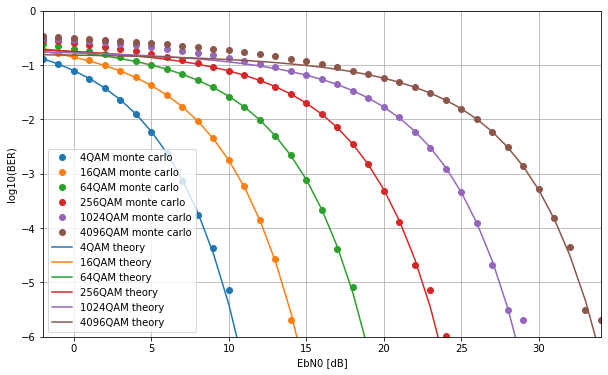

In [7]:
# Plot simulation results and theoretical curves        
BER[BER==0] = np.nan

plt.figure(figsize=(10,6))
for ii, M in enumerate(qamOrder):
    plt.plot(EbN0dB_, np.log10(BER[:,ii]), 'o', label=f'{str(M)}QAM monte carlo')

plt.gca().set_prop_cycle(None)

for M in qamOrder:
    BERtheory = theoryBER(M, EbN0dB_,'qam')
    BERtheory[BERtheory==0] = np.nan
    plt.plot(EbN0dB_, np.log10(BERtheory), '-', label=f'{str(M)}QAM theory')

plt.xlim(min(EbN0dB_), max(EbN0dB_))
plt.ylim(-6, 0)
plt.legend();
plt.xlabel('EbN0 [dB]');
plt.ylabel('log10(BER)');
plt.grid()

### PSK constellations with Gray mapping

In [8]:
# Run BER vs Ebn0 Monte Carlo simulation 

pskOrder  = [4, 8, 16, 32, 64]  # Modulation order

EbN0dB_  = np.arange(-2, 35, 1)
BER      = np.zeros((len(EbN0dB_),len(pskOrder)))
BER[:]   = np.nan

for ii, M in enumerate(pskOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(EbN0dB_.size)):

        EbN0dB = EbN0dB_[indSNR]

        # generate random bits
        bitsTx = np.random.randint(2, size=2*3*5*2**15)    

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'psk')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx) #symbTx/np.sqrt(signal_power(symbTx))

        # AWGN channel  
        snrdB  = EbN0dB + 10*np.log10(np.log2(M))
        symbRx = awgn(symbTx, snrdB)

        # BER calculation
        BER[indSNR, ii], _, _ = fastBERcalc(symbRx, symbTx, M, 'psk')

        if BER[indSNR, ii] == 0:              
            break

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  8


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  32


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

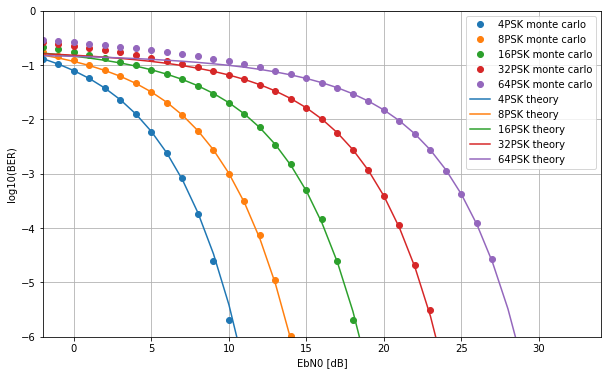

In [9]:
# Plot simulation results and theoretical curves        
BER[BER==0] = np.nan

plt.figure(figsize=(10,6))
for ii, M in enumerate(pskOrder):
    plt.plot(EbN0dB_, np.log10(BER[:,ii]), 'o', label=f'{str(M)}PSK monte carlo')

plt.gca().set_prop_cycle(None)

for M in pskOrder:
    BERtheory = theoryBER(M, EbN0dB_,'psk')
    BERtheory[BERtheory==0] = np.nan
    plt.plot(EbN0dB_, np.log10(BERtheory), '-', label=f'{str(M)}PSK theory')

plt.xlim(min(EbN0dB_), max(EbN0dB_))
plt.ylim(-6, 0)
plt.legend();
plt.xlabel('EbN0 [dB]');
plt.ylabel('log10(BER)');
plt.grid()

## Test generalized mutual information (GMI) versus signal-to-noise ratio (SNR)

### QAM constellations with Gray mapping

In [10]:
# Run GMI vs SNR Monte Carlo simulation 

qamOrder  = [4, 16, 64, 256, 1024, 4096]  # Modulation order

SNR  = np.arange(-2, 35, 1)
GMI  = np.zeros((len(SNR),len(qamOrder)))

for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random bits
        bitsTx   = np.random.randint(2, size=2*3*5*2**14)    

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'qam')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx) #symbTx/np.sqrt(signal_power(symbTx))

        # AWGN channel       
        symbRx = awgn(symbTx, snrdB)

        # GMI estimation
        GMI[indSNR, ii], _  = monteCarloGMI(symbRx, symbTx, M, 'qam')

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  1024


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  4096


  0%|          | 0/37 [00:00<?, ?it/s]

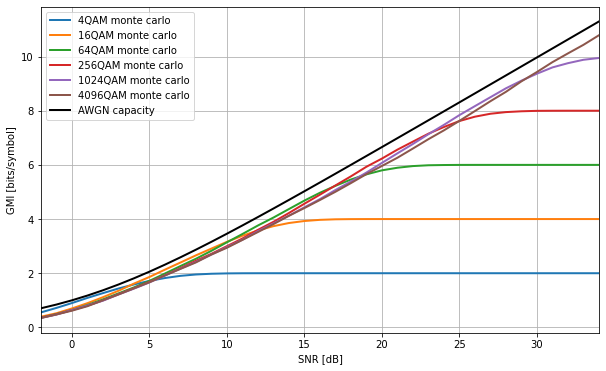

In [11]:
plt.figure(figsize=(10,6))
for ii, M in enumerate(qamOrder):
    plt.plot(SNR, GMI[:,ii], '-', label=f'{str(M)}QAM monte carlo', linewidth=2)

# plot theoretical AWGN channel capacity    
C = np.log2(1 + 10**(SNR/10))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('GMI [bits/symbol]');
plt.grid()

### PSK constellations with Gray mapping

In [12]:
# Run GMI vs SNR Monte Carlo simulation 

pskOrder  = [4, 8, 16, 32, 64]  # Modulation order

SNR  = np.arange(-2, 35, 1)
GMI  = np.zeros((len(SNR),len(pskOrder)))

for ii, M in enumerate(pskOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random bits
        bitsTx   = np.random.randint(2, size=2*3*5*2**14)    

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'psk')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx) #symbTx/np.sqrt(signal_power(symbTx))

        # AWGN channel       
        symbRx = awgn(symbTx, snrdB)

        # GMI estimation
        GMI[indSNR, ii], _  = monteCarloGMI(symbRx, symbTx, M, 'psk')

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  8


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  32


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

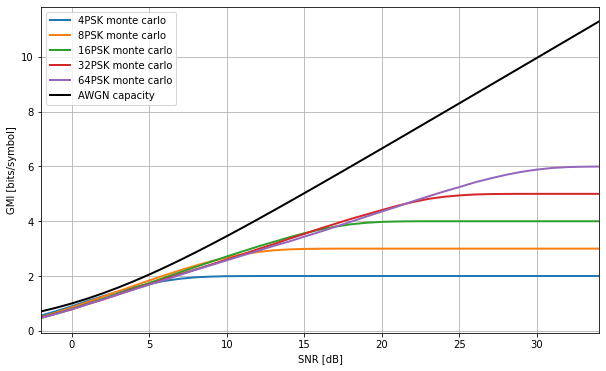

In [13]:
plt.figure(figsize=(10,6))
for ii, M in enumerate(pskOrder):
    plt.plot(SNR, GMI[:,ii], '-', label=f'{str(M)}PSK monte carlo', linewidth=2)

# plot theoretical AWGN channel capacity    
C = np.log2(1 + 10**(SNR/10))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('GMI [bits/symbol]');
plt.grid()

## Test mutual information (MI) versus signal-to-noise ratio (SNR)

### QAM constellations with Gray mapping

In [14]:
# Run MI vs SNR Monte Carlo simulation 

qamOrder  = [4, 16, 64, 256, 1024]  # Modulation order

SNR  = np.arange(-2, 35, 1)
MI  = np.zeros((len(SNR),len(qamOrder)))

for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)         

    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random bits
        bitsTx   = np.random.randint(2, size=2*3*5*2**14)    

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'qam')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx) #symbTx/np.sqrt(signal_power(symbTx))

        # AWGN channel        
        symbRx = awgn(symbTx, snrdB)

        # MI estimation
        MI[indSNR, ii] = monteCarloMI(symbRx, symbTx, M, 'qam')

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  1024


  0%|          | 0/37 [00:00<?, ?it/s]

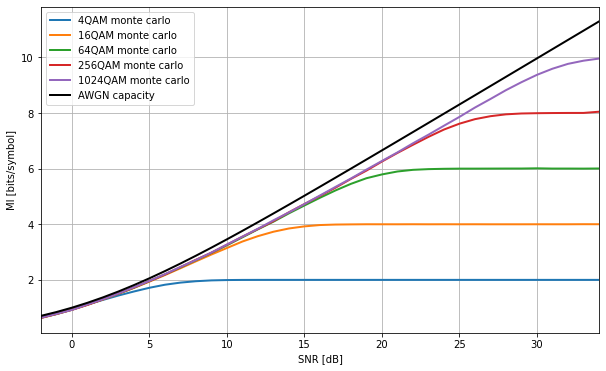

In [15]:
plt.figure(figsize=(10,6))

for ii, M in enumerate(qamOrder):
    plt.plot(SNR, MI[:,ii], '-', label=f'{str(M)}QAM monte carlo', linewidth=2)

# plot theoretical AWGN channel capacity    
C = np.log2(1 + 10**(SNR/10))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('MI [bits/symbol]');
plt.grid()

## Test mutual information (MI) versus signal-to-noise ratio (SNR) with probabilistically shaped QAM constellation

In [4]:
from numpy.random import choice

def maxwellBolt(λ, const):
    
    p = np.zeros(const.size)
    
    for ind, x in enumerate(const):
        p[ind] = np.exp(-λ*np.abs(x)**2)
        
    p = p/np.sum(p)
    
    return p   

run sim: M =  64


  0%|          | 0/36 [00:00<?, ?it/s]

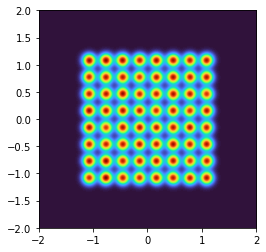

run sim: M =  64


  0%|          | 0/36 [00:00<?, ?it/s]

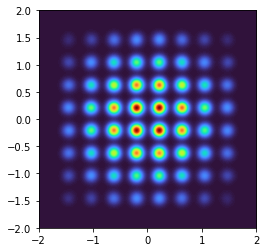

In [9]:
# Run MI vs SNR Monte Carlo simulation 

qamOrder  = [64, 64]  # Modulation order

SNR  = np.arange(-2, 34, 1)
MI  = np.zeros((len(SNR),len(qamOrder)))
Nsymbols = 80000

PS = 0
for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)

    constSymb = GrayMapping(M, 'qam')
    Es = np.mean(np.abs(constSymb) ** 2)
    constSymb = constSymb / np.sqrt(Es)

    probSymb = maxwellBolt(PS, constSymb)    
    PS = 1.5

    Es = np.sum(( np.abs(constSymb) ** 2 ) * probSymb)

    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random symbols   
        symbTx = choice(constSymb, Nsymbols, p=probSymb)           

        # AWGN channel       
        symbRx = awgn(symbTx, snrdB)      

        # MI estimation
        MI[indSNR, ii] = monteCarloMI(symbRx, symbTx, M, 'qam', probSymb)       

        if indSNR == len(SNR)-10:
            pconst(symbRx, R=2);

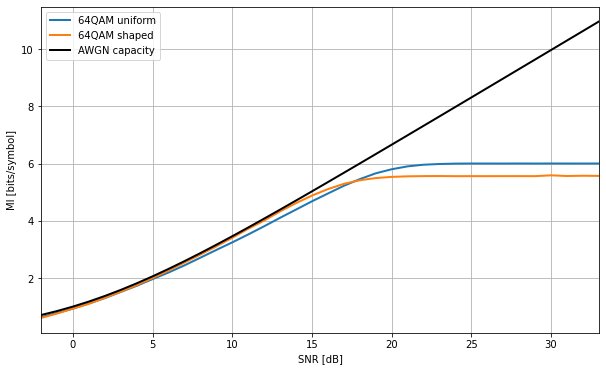

In [10]:
plt.figure(figsize=(10,6))

for ii, M in enumerate(qamOrder):
    pltLabel = 'QAM uniform' if ii == 0 else 'QAM shaped'
    plt.plot(SNR, MI[:,ii],'-', label=str(M)+pltLabel,linewidth=2)

# plot theoretical AWGN channel capacity    
C = np.log2(1 + 10**(SNR/10))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('MI [bits/symbol]');
plt.grid()